In [1]:
import csv
import matplotlib.pyplot as plt
import sys
sys.path.append('/public4/home/sc57082/local/pygadgetreader')
import readgadget as rg 
import numpy as np
from scipy.spatial import cKDTree
import astropy.coordinates as coord
import astropy.units as u
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit

In [2]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [26]:
def cent_h(X):


    # 构建 KD 树
    tree = cKDTree(X)  

    # 为每个点查询最近的30个邻居点
    dist, ind = tree.query(X, k=50)  

    # 计算局部密度
    epsilon = 1e-5
    rho = 1 / (dist + epsilon).sum(axis=1)

    # 密度最大值点的索引
    densest_idx = np.argmax(rho)

    return X[densest_idx]

In [27]:
a=0
b=0.69
v0=204
gc = coord.SkyCoord(x=  -15*np.cos(a/180*np.pi)* u.kpc, y=0* u.kpc,
             z= 15*np.sin(a/180*np.pi)* u.kpc,
             v_x=-v0*np.sin(b)*np.cos(a/180*np.pi)* u.km / u.s,
             v_y= v0*np.cos(b)* u.km / u.s,
             v_z= v0*np.sin(b)*np.sin(a/180*np.pi) * u.km / u.s, frame='galactocentric',
             representation_type='cartesian', differential_type='cartesian',
             galcen_distance=8.0* u.kpc, z_sun=0 * u.pc,
             galcen_v_sun=coord.CartesianDifferential(
                 [11.7, 241.63, 7.67] * u.km / u.s))  
ts= np.linspace(0,2,50000)*u.Gyr
o= Orbit(gc)
o.integrate(ts,MWPotential2014)

In [36]:
runpath = '/public4/home/sc57082/GC/Output/cusp/cusp_8sun/incl_0/ndm/'
n=104
pos=[]
for i in range(0,n):
    snapfname = runpath + 'snapshot_' + str(i).zfill(3) 

    pbulge = rg.readsnap(snapfname, 'pos', 'bulge')
    mbulge = rg.readsnap(snapfname, 'mass', 'bulge')
    idbulge = rg.readsnap(snapfname, 'pid', 'bulge')
    vbulge = rg.readsnap(snapfname, 'vel', 'bulge')
    cent = cent_h(pbulge)
    pos.append(cent)
pos=np.array(pos)
print(pos.shape)

Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle I

Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle I

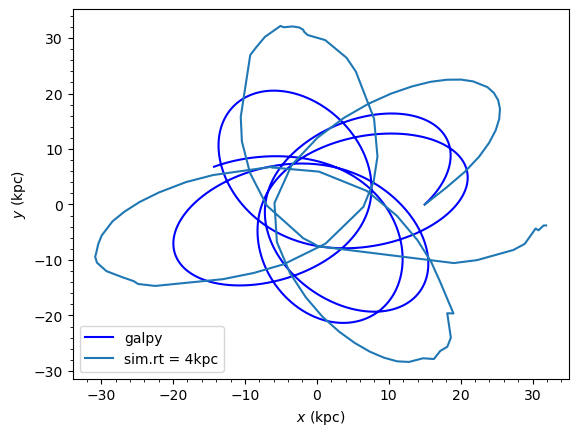

In [39]:

o.plot(d1='x',d2='y',color='blue',label='galpy')
plt.plot(pos[:,0],pos[:,1],label='sim.rt = 4kpc')
plt.legend(loc='lower left')

In [31]:
2.02*0.98

1.9796